In [1]:
import pandas as pd
orders = pd.read_csv('../data/Orders.csv')

In [2]:
orders.shape

(51290, 24)

In [3]:
import re
orders['Sales']=orders['Sales'].apply(lambda x: re.sub("\$", "", x)).apply(lambda x: re.sub("\,", "", x)).apply(pd.to_numeric)
orders['Profit']=orders['Profit'].apply(lambda x: re.sub("\$", "", x)).apply(lambda x: re.sub("\,", "", x)).apply(pd.to_numeric)


In [4]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

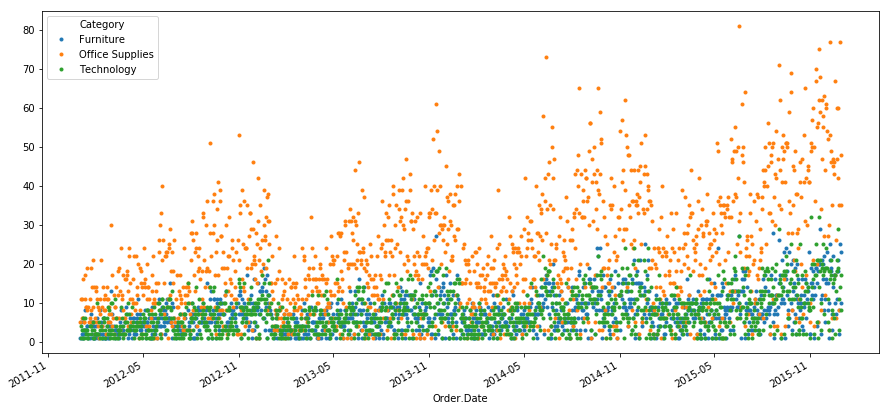

In [25]:
import matplotlib.pyplot as plt
# plot data by categoy per day
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
orders.groupby(['Order.Date','Category']).count()['Sales'].unstack().plot(ax=ax,  marker='o', linestyle='', ms=3)
plt.show()

In [39]:
returns = pd.read_csv('../data/Returns.csv')
Returns = pd.merge(orders, returns, on = 'Order.ID', how='inner')
Returns.head()

KeyError: 'Order.ID'

In [33]:
orders['loss'] = orders.loc[orders['Profit']<0]
orders.groupby(orders['Order.Date'].dt.year).agg({'loss':sum})

ValueError: Wrong number of items passed 24, placement implies 1

In [36]:
returns.columns

Index(['Returned', 'Order ID', 'Region'], dtype='object')

In [40]:
orders.head(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.1,763.28,897.35,Critical
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.0,564.84,894.77,Critical
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.0,996.48,878.38,High
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High
